1- To run the code, you need to install Jupyter Notebook. You can do so by visiting this link: https://jupyter.org/install. 

2- Additionally, you must install the necessary libraries to run the model, including numpy, pandas, matplotlib, seaborn, and scikit-learn (sklearn).
    

# Data Analysis:

In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load MAT file
mat_data = loadmat('QSAR_data.mat')
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'QSAR_data'])


In [4]:
# converting the data into a pandas dataframe
df = pd.DataFrame(mat_data['QSAR_data'])
print(df.shape)
print(df.columns)

df.head()

(1055, 42)
RangeIndex(start=0, stop=42, step=1)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,1.0
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,1.0
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,3.076,2.417,0.0,7.601,0.0,0.0,1.0
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,0.0,2.0,...,0.0,0.0,1.0,3.046,5.000,0.0,6.690,0.0,0.0,1.0
4,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,0.0,1.0


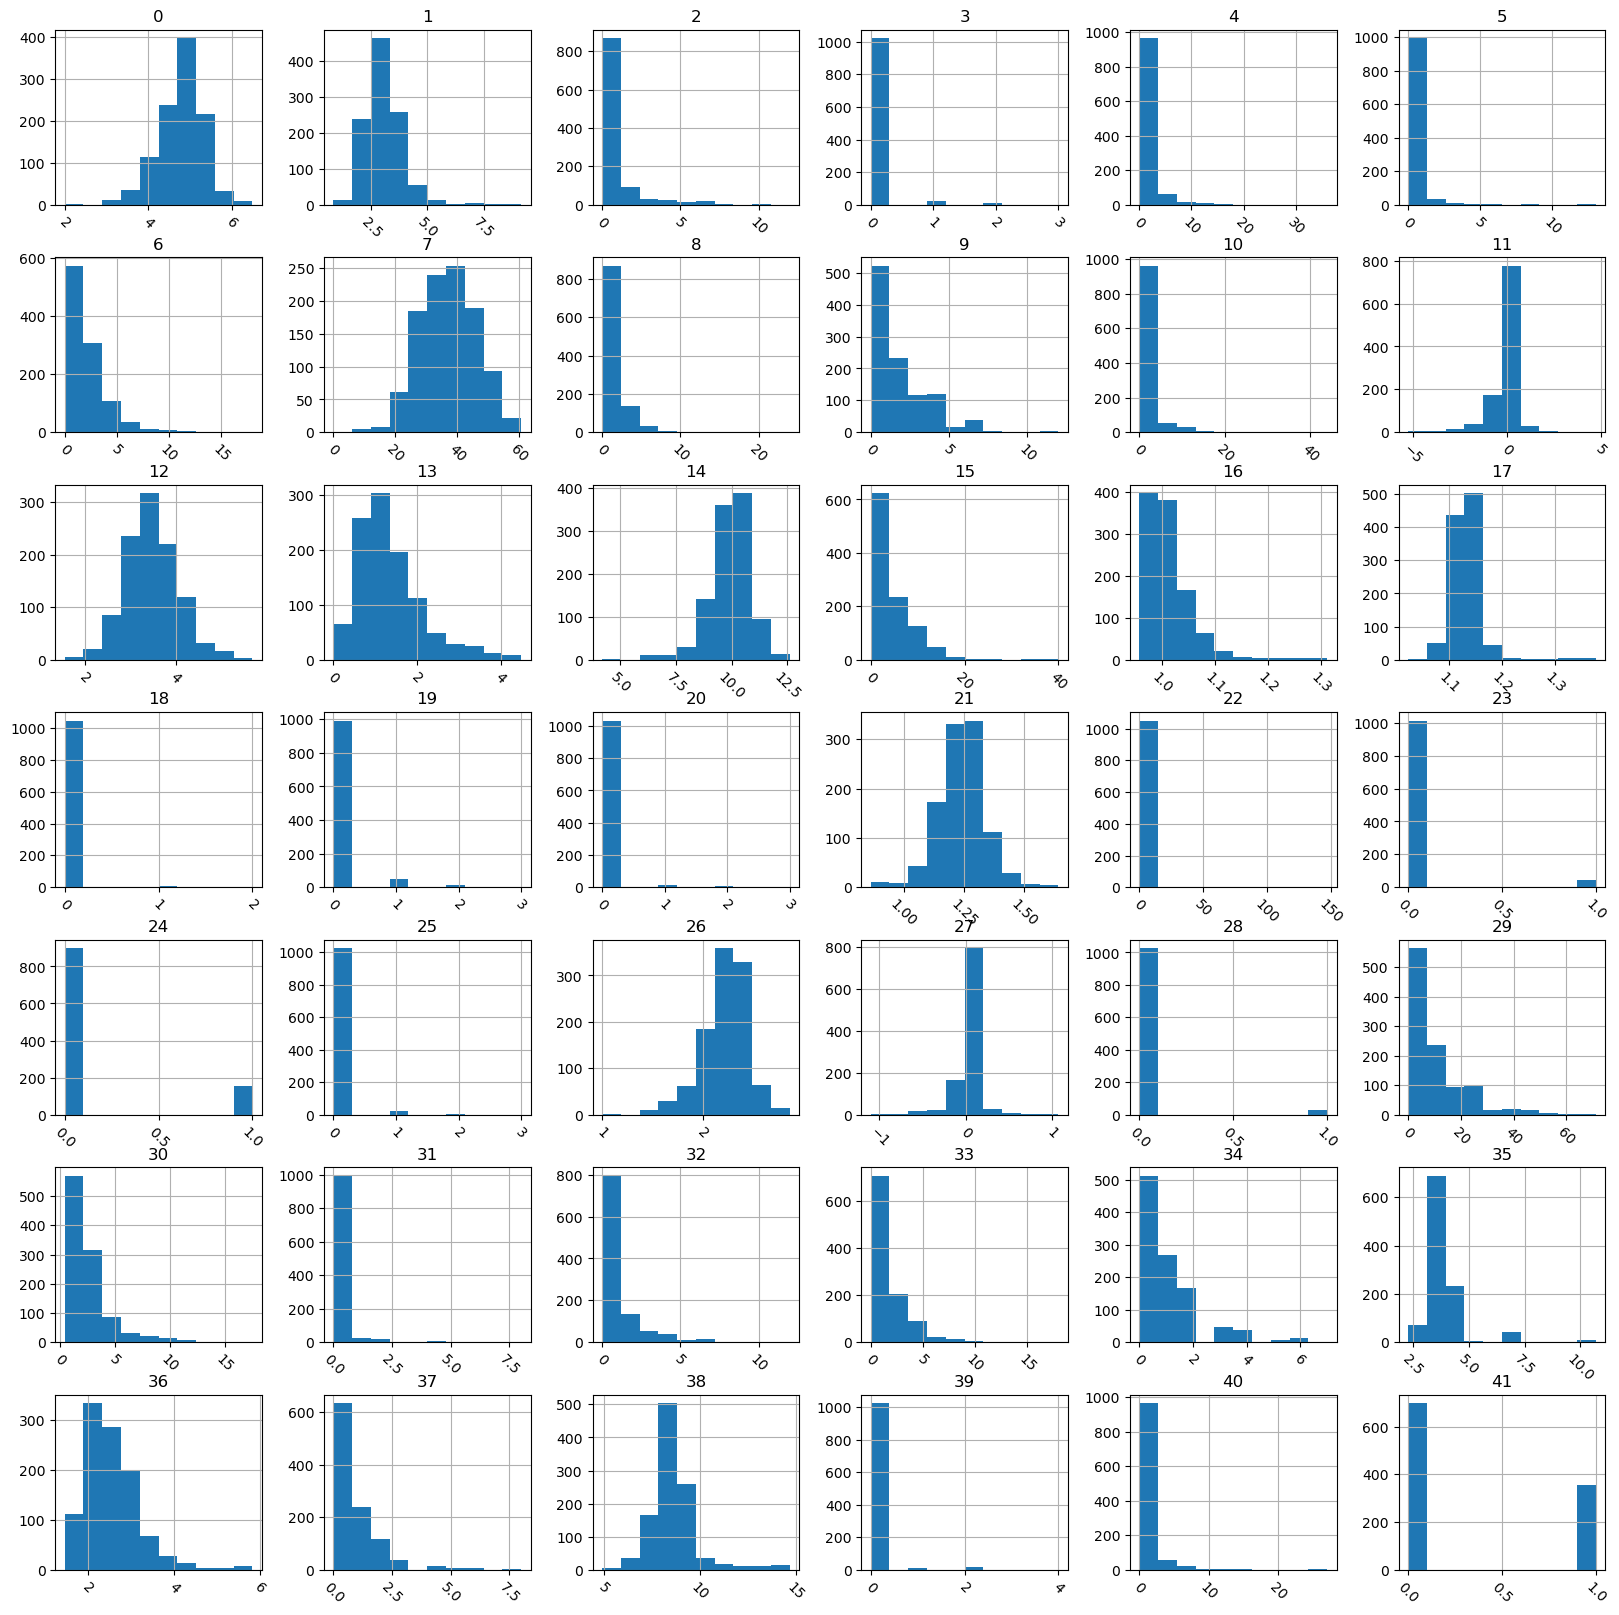

In [5]:
df.hist(figsize=(20,20), xrot=-45) # Display the labels rotated by 45 degress.
plt.show()

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


In [7]:
# Deleting specified columns
df = df.drop(columns=[3, 5, 18, 20, 22, 23, 25, 28, 31, 39])

In [10]:
print(df.shape)

(1052, 32)


In [11]:
# Check duplicates in the dataset that are similar to each other, and delete them.
df = df.drop_duplicates()
print(df.shape)

(1052, 32)


In [12]:
# Check for NaN values in the DataFrame
df.isna().any().any()

False

In [13]:
# check for duplicate columns 
df.columns.duplicated().any()

False

# Spliting Data:

In [15]:
# Data Preparation
y = df[41]

# Create separate object for input features
X = df.drop(41, axis=1)

print(X.shape, y.shape)

(1052, 31) (1052,)


In [16]:
# To split train and test set
from sklearn.model_selection import train_test_split

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    stratify=y)

# 'stratify' parameter is used to ensure that the splitting of the data into training and testing sets maintains the same distribution of the target variable y.

In [17]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(841, 31) (211, 31) (841,) (211,)


# Data Standardization:

In [19]:
# Standardize the train data set (Z-score normalization)
train_mean = X_train.mean()
train_std = X_train.std()

X_train = (X_train - train_mean) / train_std

In [20]:
# We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [21]:
X_train.head()

,0,1,2,4,6,7,8,9,10,11,...,29,30,32,33,34,35,36,37,38,40
21,-1.400894,-0.809845,-0.487417,-0.417975,-0.739128,-0.760162,-0.187404,-0.427117,-0.452599,0.247868,...,-0.728748,-0.802739,-0.575616,-0.552420,-0.762866,-0.606926,-0.722471,-0.629274,-1.150047,-0.319233
22,-2.453992,-0.947963,-0.487417,-0.417975,-0.739128,-1.834358,0.303583,0.140348,-0.452599,0.247868,...,-0.728748,-0.463521,-0.575616,-0.552420,0.831098,-1.093354,1.804022,-0.629274,-1.832227,-0.319233
286,0.363853,-0.782198,-0.487417,-0.417975,-0.739128,0.539614,-0.678392,0.707814,-0.452599,-0.634541,...,1.118691,-0.789784,-0.575616,-0.552420,-0.762866,-0.214775,0.323288,-0.629274,-0.252989,-0.319233
662,0.956894,-0.804551,0.190133,-0.417975,0.158499,0.152904,0.303583,1.275279,-0.452599,0.247868,...,0.383903,0.516228,0.757973,-0.552420,-0.762866,0.526400,-0.576974,-0.629274,0.705578,-0.319233
271,-1.674053,-0.568668,-0.487417,0.393843,-0.739128,-1.297260,0.303583,-0.994583,0.157394,0.247868,...,-0.728748,0.293122,-0.575616,0.291513,2.425062,-0.992057,-0.658816,1.167737,-1.325785,-0.319233


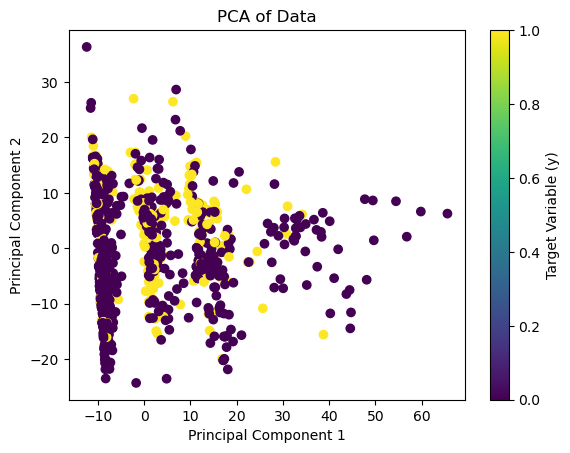

In [22]:
# Visulize data before standardisation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

# Create a scatter plot of the first two principal components
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data')
plt.colorbar(label='Target Variable (y)')
plt.show()

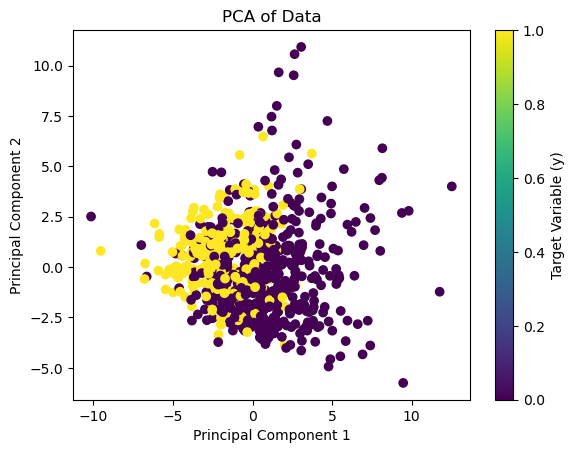

In [23]:
# Visulize data after standardisation
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)

# Create a scatter plot of the first two principal components
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data')
plt.colorbar(label='Target Variable (y)')
plt.show()

# Model (1): Logistic Regression

In [24]:
# To perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [25]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
# 'C' parameter controls the strength of the regularization.

model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
# 'GridSearchCV' performs an exhaustive search over a specified parameter grid. It helps to find the best hyperparameters for a machine learning model through cross-validation.
# scoring='roc_auc' specifies the evaluation metric to be used during the grid search.
# n_jobs=-1 indicates that the grid search should use all available processors for parallelization, speeding up the search process.

model.fit(X_train, y_train)

/Users/ameeralwadiya/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ameeralwadiya/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [26]:
model.best_estimator_

LogisticRegression(C=0.1)

In [27]:
# Predict Train set results
y_train_pred = model.predict(X_train)

In [28]:
# Predict Test set results
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5].to_numpy())

[0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0.]


In [29]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]
# 'predict_proba()' method is used to generate class probabilities for each instance in the test dataset. 
# '[:, 1]' This indexing is used to extract the predicted probabilities for the positive class.

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[122,  10],
       [ 18,  61]])

In [32]:
# Calculate ROC curve from y_test and pred:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# 'fpr' False Positive Rate.
# 'tpr' True Positive Rate.
# The ROC curve is created by varying the classification threshold, and thresholds provides the corresponding thresholds at which FPR and TPR are calculated.

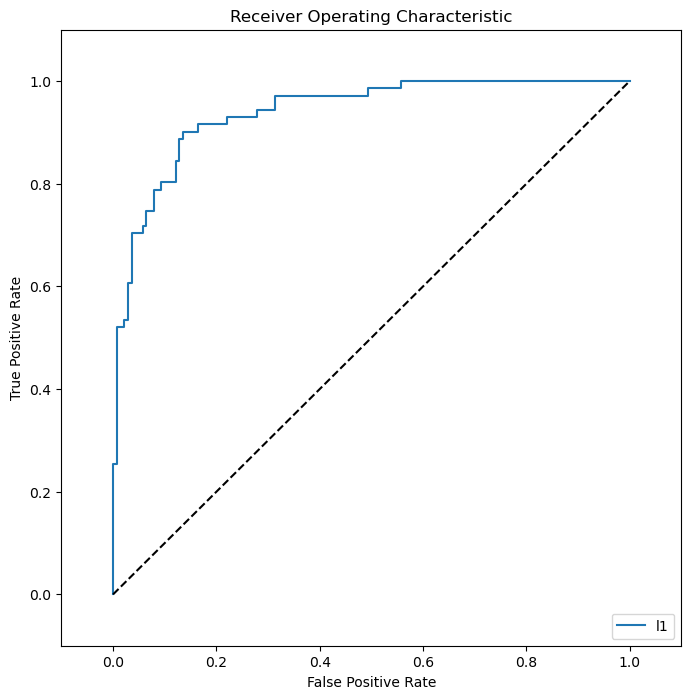

In [33]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line:
plt.plot([0,1],[0,1],'k--')
# [0,1] and [0,1], represent the x and y coordinates of the points to be plotted. In this case, it's a line from (0,0) to (1,1).
# 'k' represents black, and '--' represents a dashed line.

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
# Calculate AUC for Test set:
print(auc(fpr, tpr))

0.9395372233400403


# Model (2): Support Vector Classification (SVC)

In [35]:
# From sklearn import svm
from sklearn import svm
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
# The hyperparameters being tuned are 'C' and 'gamma' for an SVM model with a radial basis function (RBF) kernel.
    
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
    
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [36]:
# Building the model again with the best hyperparameters:
model = SVC(C=10, gamma=0.01, probability=True)
# probability=True: This parameter allows the SVC to output class probabilities.

model.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [37]:
# Predict Test results:
y_pred = model.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[127,  13],
       [ 10,  61]])

In [41]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [42]:
# Calculate ROC curve from y_test and pred:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

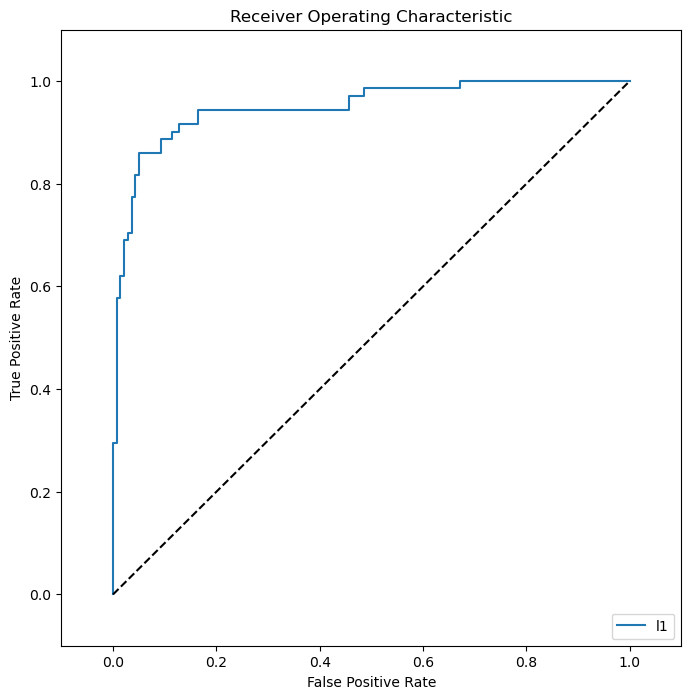

In [43]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
auc(fpr, tpr)

0.9491951710261569

# Model (3): Logistic Regression from scrach

In [45]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_strength=0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
        self.cost_list = []
        self.regularization_strength = regularization_strength

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_backward_propagation(self, x_train, y_train):        
        z = np.dot(self.w.T, x_train) + self.b
        y_head = self.sigmoid(z)

        loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
        
        regularization_term = 0.5 * (self.regularization_strength / x_train.shape[1]) * np.sum(self.w ** 2)
        
        cost = np.sum(loss) / x_train.shape[1] + regularization_term

        # Backward propagation
        derivative_weight = (np.dot(x_train, (y_head - y_train).T) + self.regularization_strength * self.w) / x_train.shape[1]
        derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
        gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
        return cost, gradients

    def update(self, x_train, y_train):
        for i in range(self.num_iterations):
            cost, gradients = self.forward_backward_propagation(x_train, y_train)
            self.cost_list.append(cost)

            # Update parameters
            self.w -= self.learning_rate * gradients["derivative_weight"]
            self.b -= self.learning_rate * gradients["derivative_bias"]

            if i % 10 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

        parameters = {"weight": self.w, "bias": self.b}
        return parameters

    def predict(self, x_test):
        z = self.sigmoid(np.dot(self.w.T, x_test) + self.b)
        y_prediction = np.where(z <= 0.5, 0, 1).reshape(-1)
        return y_prediction

    def fit(self, x_train, y_train):
        self.w = np.full((x_train.shape[0], 1), 0.0)
        self.b = 0.0

        parameters = self.update(x_train, y_train)

    def predict_proba(self, x_test):
        z = self.sigmoid(np.dot(self.w.T, x_test) + self.b).flatten()
        
        return z

In [46]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(841, 31) (841,) (211, 31) (211,)


In [47]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [48]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [49]:
logistic_regression = LogisticRegression(learning_rate=0.02, num_iterations=100000, regularization_strength=0)
logistic_regression.fit(X_train, y_train)

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.628729
Cost after iteration 20: 0.589584
Cost after iteration 30: 0.563180
Cost after iteration 40: 0.543837
Cost after iteration 50: 0.528788
Cost after iteration 60: 0.516557
Cost after iteration 70: 0.506290
Cost after iteration 80: 0.497459
Cost after iteration 90: 0.489722
Cost after iteration 100: 0.482845
Cost after iteration 110: 0.476663
Cost after iteration 120: 0.471054
Cost after iteration 130: 0.465928
Cost after iteration 140: 0.461214
Cost after iteration 150: 0.456857
Cost after iteration 160: 0.452811
Cost after iteration 170: 0.449042
Cost after iteration 180: 0.445517
Cost after iteration 190: 0.442211
Cost after iteration 200: 0.439104
Cost after iteration 210: 0.436176
Cost after iteration 220: 0.433411
Cost after iteration 230: 0.430795
Cost after iteration 240: 0.428316
Cost after iteration 250: 0.425962
Cost after iteration 260: 0.423724
Cost after iteration 270: 0.421594
Cost after iteration 280: 0.419

Cost after iteration 3570: 0.340236
Cost after iteration 3580: 0.340207
Cost after iteration 3590: 0.340179
Cost after iteration 3600: 0.340150
Cost after iteration 3610: 0.340122
Cost after iteration 3620: 0.340093
Cost after iteration 3630: 0.340065
Cost after iteration 3640: 0.340037
Cost after iteration 3650: 0.340010
Cost after iteration 3660: 0.339982
Cost after iteration 3670: 0.339954
Cost after iteration 3680: 0.339927
Cost after iteration 3690: 0.339900
Cost after iteration 3700: 0.339873
Cost after iteration 3710: 0.339846
Cost after iteration 3720: 0.339819
Cost after iteration 3730: 0.339793
Cost after iteration 3740: 0.339766
Cost after iteration 3750: 0.339740
Cost after iteration 3760: 0.339714
Cost after iteration 3770: 0.339688
Cost after iteration 3780: 0.339662
Cost after iteration 3790: 0.339636
Cost after iteration 3800: 0.339610
Cost after iteration 3810: 0.339585
Cost after iteration 3820: 0.339560
Cost after iteration 3830: 0.339534
Cost after iteration 3840: 0

Cost after iteration 7410: 0.334892
Cost after iteration 7420: 0.334885
Cost after iteration 7430: 0.334878
Cost after iteration 7440: 0.334871
Cost after iteration 7450: 0.334864
Cost after iteration 7460: 0.334858
Cost after iteration 7470: 0.334851
Cost after iteration 7480: 0.334844
Cost after iteration 7490: 0.334837
Cost after iteration 7500: 0.334831
Cost after iteration 7510: 0.334824
Cost after iteration 7520: 0.334817
Cost after iteration 7530: 0.334811
Cost after iteration 7540: 0.334804
Cost after iteration 7550: 0.334797
Cost after iteration 7560: 0.334791
Cost after iteration 7570: 0.334784
Cost after iteration 7580: 0.334777
Cost after iteration 7590: 0.334771
Cost after iteration 7600: 0.334764
Cost after iteration 7610: 0.334758
Cost after iteration 7620: 0.334751
Cost after iteration 7630: 0.334745
Cost after iteration 7640: 0.334738
Cost after iteration 7650: 0.334732
Cost after iteration 7660: 0.334725
Cost after iteration 7670: 0.334719
Cost after iteration 7680: 0

Cost after iteration 11230: 0.333070
Cost after iteration 11240: 0.333066
Cost after iteration 11250: 0.333063
Cost after iteration 11260: 0.333060
Cost after iteration 11270: 0.333056
Cost after iteration 11280: 0.333053
Cost after iteration 11290: 0.333049
Cost after iteration 11300: 0.333046
Cost after iteration 11310: 0.333043
Cost after iteration 11320: 0.333039
Cost after iteration 11330: 0.333036
Cost after iteration 11340: 0.333032
Cost after iteration 11350: 0.333029
Cost after iteration 11360: 0.333026
Cost after iteration 11370: 0.333022
Cost after iteration 11380: 0.333019
Cost after iteration 11390: 0.333015
Cost after iteration 11400: 0.333012
Cost after iteration 11410: 0.333009
Cost after iteration 11420: 0.333005
Cost after iteration 11430: 0.333002
Cost after iteration 11440: 0.332999
Cost after iteration 11450: 0.332995
Cost after iteration 11460: 0.332992
Cost after iteration 11470: 0.332989
Cost after iteration 11480: 0.332985
Cost after iteration 11490: 0.332982
C

Cost after iteration 14940: 0.332027
Cost after iteration 14950: 0.332025
Cost after iteration 14960: 0.332022
Cost after iteration 14970: 0.332020
Cost after iteration 14980: 0.332018
Cost after iteration 14990: 0.332015
Cost after iteration 15000: 0.332013
Cost after iteration 15010: 0.332011
Cost after iteration 15020: 0.332008
Cost after iteration 15030: 0.332006
Cost after iteration 15040: 0.332004
Cost after iteration 15050: 0.332001
Cost after iteration 15060: 0.331999
Cost after iteration 15070: 0.331997
Cost after iteration 15080: 0.331994
Cost after iteration 15090: 0.331992
Cost after iteration 15100: 0.331990
Cost after iteration 15110: 0.331987
Cost after iteration 15120: 0.331985
Cost after iteration 15130: 0.331983
Cost after iteration 15140: 0.331980
Cost after iteration 15150: 0.331978
Cost after iteration 15160: 0.331976
Cost after iteration 15170: 0.331974
Cost after iteration 15180: 0.331971
Cost after iteration 15190: 0.331969
Cost after iteration 15200: 0.331967
C

Cost after iteration 18960: 0.331206
Cost after iteration 18970: 0.331204
Cost after iteration 18980: 0.331202
Cost after iteration 18990: 0.331200
Cost after iteration 19000: 0.331199
Cost after iteration 19010: 0.331197
Cost after iteration 19020: 0.331195
Cost after iteration 19030: 0.331193
Cost after iteration 19040: 0.331191
Cost after iteration 19050: 0.331190
Cost after iteration 19060: 0.331188
Cost after iteration 19070: 0.331186
Cost after iteration 19080: 0.331184
Cost after iteration 19090: 0.331183
Cost after iteration 19100: 0.331181
Cost after iteration 19110: 0.331179
Cost after iteration 19120: 0.331177
Cost after iteration 19130: 0.331175
Cost after iteration 19140: 0.331174
Cost after iteration 19150: 0.331172
Cost after iteration 19160: 0.331170
Cost after iteration 19170: 0.331168
Cost after iteration 19180: 0.331167
Cost after iteration 19190: 0.331165
Cost after iteration 19200: 0.331163
Cost after iteration 19210: 0.331161
Cost after iteration 19220: 0.331160
C

Cost after iteration 22590: 0.330615
Cost after iteration 22600: 0.330613
Cost after iteration 22610: 0.330612
Cost after iteration 22620: 0.330610
Cost after iteration 22630: 0.330609
Cost after iteration 22640: 0.330607
Cost after iteration 22650: 0.330606
Cost after iteration 22660: 0.330604
Cost after iteration 22670: 0.330603
Cost after iteration 22680: 0.330601
Cost after iteration 22690: 0.330600
Cost after iteration 22700: 0.330598
Cost after iteration 22710: 0.330597
Cost after iteration 22720: 0.330595
Cost after iteration 22730: 0.330594
Cost after iteration 22740: 0.330592
Cost after iteration 22750: 0.330591
Cost after iteration 22760: 0.330589
Cost after iteration 22770: 0.330588
Cost after iteration 22780: 0.330587
Cost after iteration 22790: 0.330585
Cost after iteration 22800: 0.330584
Cost after iteration 22810: 0.330582
Cost after iteration 22820: 0.330581
Cost after iteration 22830: 0.330579
Cost after iteration 22840: 0.330578
Cost after iteration 22850: 0.330576
C

Cost after iteration 26050: 0.330142
Cost after iteration 26060: 0.330140
Cost after iteration 26070: 0.330139
Cost after iteration 26080: 0.330138
Cost after iteration 26090: 0.330136
Cost after iteration 26100: 0.330135
Cost after iteration 26110: 0.330134
Cost after iteration 26120: 0.330133
Cost after iteration 26130: 0.330131
Cost after iteration 26140: 0.330130
Cost after iteration 26150: 0.330129
Cost after iteration 26160: 0.330128
Cost after iteration 26170: 0.330126
Cost after iteration 26180: 0.330125
Cost after iteration 26190: 0.330124
Cost after iteration 26200: 0.330123
Cost after iteration 26210: 0.330121
Cost after iteration 26220: 0.330120
Cost after iteration 26230: 0.330119
Cost after iteration 26240: 0.330118
Cost after iteration 26250: 0.330116
Cost after iteration 26260: 0.330115
Cost after iteration 26270: 0.330114
Cost after iteration 26280: 0.330113
Cost after iteration 26290: 0.330111
Cost after iteration 26300: 0.330110
Cost after iteration 26310: 0.330109
C

Cost after iteration 29620: 0.329725
Cost after iteration 29630: 0.329724
Cost after iteration 29640: 0.329723
Cost after iteration 29650: 0.329722
Cost after iteration 29660: 0.329721
Cost after iteration 29670: 0.329720
Cost after iteration 29680: 0.329719
Cost after iteration 29690: 0.329717
Cost after iteration 29700: 0.329716
Cost after iteration 29710: 0.329715
Cost after iteration 29720: 0.329714
Cost after iteration 29730: 0.329713
Cost after iteration 29740: 0.329712
Cost after iteration 29750: 0.329711
Cost after iteration 29760: 0.329710
Cost after iteration 29770: 0.329709
Cost after iteration 29780: 0.329708
Cost after iteration 29790: 0.329707
Cost after iteration 29800: 0.329706
Cost after iteration 29810: 0.329705
Cost after iteration 29820: 0.329704
Cost after iteration 29830: 0.329702
Cost after iteration 29840: 0.329701
Cost after iteration 29850: 0.329700
Cost after iteration 29860: 0.329699
Cost after iteration 29870: 0.329698
Cost after iteration 29880: 0.329697
C

Cost after iteration 33180: 0.329369
Cost after iteration 33190: 0.329368
Cost after iteration 33200: 0.329367
Cost after iteration 33210: 0.329366
Cost after iteration 33220: 0.329365
Cost after iteration 33230: 0.329364
Cost after iteration 33240: 0.329363
Cost after iteration 33250: 0.329362
Cost after iteration 33260: 0.329361
Cost after iteration 33270: 0.329360
Cost after iteration 33280: 0.329359
Cost after iteration 33290: 0.329359
Cost after iteration 33300: 0.329358
Cost after iteration 33310: 0.329357
Cost after iteration 33320: 0.329356
Cost after iteration 33330: 0.329355
Cost after iteration 33340: 0.329354
Cost after iteration 33350: 0.329353
Cost after iteration 33360: 0.329352
Cost after iteration 33370: 0.329351
Cost after iteration 33380: 0.329350
Cost after iteration 33390: 0.329349
Cost after iteration 33400: 0.329348
Cost after iteration 33410: 0.329347
Cost after iteration 33420: 0.329347
Cost after iteration 33430: 0.329346
Cost after iteration 33440: 0.329345
C

Cost after iteration 36540: 0.329078
Cost after iteration 36550: 0.329077
Cost after iteration 36560: 0.329076
Cost after iteration 36570: 0.329075
Cost after iteration 36580: 0.329075
Cost after iteration 36590: 0.329074
Cost after iteration 36600: 0.329073
Cost after iteration 36610: 0.329072
Cost after iteration 36620: 0.329071
Cost after iteration 36630: 0.329071
Cost after iteration 36640: 0.329070
Cost after iteration 36650: 0.329069
Cost after iteration 36660: 0.329068
Cost after iteration 36670: 0.329067
Cost after iteration 36680: 0.329067
Cost after iteration 36690: 0.329066
Cost after iteration 36700: 0.329065
Cost after iteration 36710: 0.329064
Cost after iteration 36720: 0.329063
Cost after iteration 36730: 0.329063
Cost after iteration 36740: 0.329062
Cost after iteration 36750: 0.329061
Cost after iteration 36760: 0.329060
Cost after iteration 36770: 0.329059
Cost after iteration 36780: 0.329059
Cost after iteration 36790: 0.329058
Cost after iteration 36800: 0.329057
C

Cost after iteration 39760: 0.328835
Cost after iteration 39770: 0.328834
Cost after iteration 39780: 0.328833
Cost after iteration 39790: 0.328833
Cost after iteration 39800: 0.328832
Cost after iteration 39810: 0.328831
Cost after iteration 39820: 0.328830
Cost after iteration 39830: 0.328830
Cost after iteration 39840: 0.328829
Cost after iteration 39850: 0.328828
Cost after iteration 39860: 0.328828
Cost after iteration 39870: 0.328827
Cost after iteration 39880: 0.328826
Cost after iteration 39890: 0.328825
Cost after iteration 39900: 0.328825
Cost after iteration 39910: 0.328824
Cost after iteration 39920: 0.328823
Cost after iteration 39930: 0.328823
Cost after iteration 39940: 0.328822
Cost after iteration 39950: 0.328821
Cost after iteration 39960: 0.328821
Cost after iteration 39970: 0.328820
Cost after iteration 39980: 0.328819
Cost after iteration 39990: 0.328818
Cost after iteration 40000: 0.328818
Cost after iteration 40010: 0.328817
Cost after iteration 40020: 0.328816
C

Cost after iteration 42780: 0.328634
Cost after iteration 42790: 0.328633
Cost after iteration 42800: 0.328633
Cost after iteration 42810: 0.328632
Cost after iteration 42820: 0.328631
Cost after iteration 42830: 0.328631
Cost after iteration 42840: 0.328630
Cost after iteration 42850: 0.328629
Cost after iteration 42860: 0.328629
Cost after iteration 42870: 0.328628
Cost after iteration 42880: 0.328628
Cost after iteration 42890: 0.328627
Cost after iteration 42900: 0.328626
Cost after iteration 42910: 0.328626
Cost after iteration 42920: 0.328625
Cost after iteration 42930: 0.328625
Cost after iteration 42940: 0.328624
Cost after iteration 42950: 0.328623
Cost after iteration 42960: 0.328623
Cost after iteration 42970: 0.328622
Cost after iteration 42980: 0.328621
Cost after iteration 42990: 0.328621
Cost after iteration 43000: 0.328620
Cost after iteration 43010: 0.328620
Cost after iteration 43020: 0.328619
Cost after iteration 43030: 0.328618
Cost after iteration 43040: 0.328618
C

Cost after iteration 45920: 0.328450
Cost after iteration 45930: 0.328449
Cost after iteration 45940: 0.328449
Cost after iteration 45950: 0.328448
Cost after iteration 45960: 0.328447
Cost after iteration 45970: 0.328447
Cost after iteration 45980: 0.328446
Cost after iteration 45990: 0.328446
Cost after iteration 46000: 0.328445
Cost after iteration 46010: 0.328445
Cost after iteration 46020: 0.328444
Cost after iteration 46030: 0.328444
Cost after iteration 46040: 0.328443
Cost after iteration 46050: 0.328442
Cost after iteration 46060: 0.328442
Cost after iteration 46070: 0.328441
Cost after iteration 46080: 0.328441
Cost after iteration 46090: 0.328440
Cost after iteration 46100: 0.328440
Cost after iteration 46110: 0.328439
Cost after iteration 46120: 0.328439
Cost after iteration 46130: 0.328438
Cost after iteration 46140: 0.328438
Cost after iteration 46150: 0.328437
Cost after iteration 46160: 0.328436
Cost after iteration 46170: 0.328436
Cost after iteration 46180: 0.328435
C

Cost after iteration 49340: 0.328274
Cost after iteration 49350: 0.328273
Cost after iteration 49360: 0.328273
Cost after iteration 49370: 0.328272
Cost after iteration 49380: 0.328272
Cost after iteration 49390: 0.328271
Cost after iteration 49400: 0.328271
Cost after iteration 49410: 0.328270
Cost after iteration 49420: 0.328270
Cost after iteration 49430: 0.328270
Cost after iteration 49440: 0.328269
Cost after iteration 49450: 0.328269
Cost after iteration 49460: 0.328268
Cost after iteration 49470: 0.328268
Cost after iteration 49480: 0.328267
Cost after iteration 49490: 0.328267
Cost after iteration 49500: 0.328266
Cost after iteration 49510: 0.328266
Cost after iteration 49520: 0.328265
Cost after iteration 49530: 0.328265
Cost after iteration 49540: 0.328264
Cost after iteration 49550: 0.328264
Cost after iteration 49560: 0.328263
Cost after iteration 49570: 0.328263
Cost after iteration 49580: 0.328262
Cost after iteration 49590: 0.328262
Cost after iteration 49600: 0.328261
C

Cost after iteration 51680: 0.328167
Cost after iteration 51690: 0.328166
Cost after iteration 51700: 0.328166
Cost after iteration 51710: 0.328165
Cost after iteration 51720: 0.328165
Cost after iteration 51730: 0.328165
Cost after iteration 51740: 0.328164
Cost after iteration 51750: 0.328164
Cost after iteration 51760: 0.328163
Cost after iteration 51770: 0.328163
Cost after iteration 51780: 0.328162
Cost after iteration 51790: 0.328162
Cost after iteration 51800: 0.328161
Cost after iteration 51810: 0.328161
Cost after iteration 51820: 0.328161
Cost after iteration 51830: 0.328160
Cost after iteration 51840: 0.328160
Cost after iteration 51850: 0.328159
Cost after iteration 51860: 0.328159
Cost after iteration 51870: 0.328158
Cost after iteration 51880: 0.328158
Cost after iteration 51890: 0.328158
Cost after iteration 51900: 0.328157
Cost after iteration 51910: 0.328157
Cost after iteration 51920: 0.328156
Cost after iteration 51930: 0.328156
Cost after iteration 51940: 0.328155
C

Cost after iteration 54840: 0.328037
Cost after iteration 54850: 0.328037
Cost after iteration 54860: 0.328036
Cost after iteration 54870: 0.328036
Cost after iteration 54880: 0.328036
Cost after iteration 54890: 0.328035
Cost after iteration 54900: 0.328035
Cost after iteration 54910: 0.328034
Cost after iteration 54920: 0.328034
Cost after iteration 54930: 0.328034
Cost after iteration 54940: 0.328033
Cost after iteration 54950: 0.328033
Cost after iteration 54960: 0.328032
Cost after iteration 54970: 0.328032
Cost after iteration 54980: 0.328032
Cost after iteration 54990: 0.328031
Cost after iteration 55000: 0.328031
Cost after iteration 55010: 0.328031
Cost after iteration 55020: 0.328030
Cost after iteration 55030: 0.328030
Cost after iteration 55040: 0.328029
Cost after iteration 55050: 0.328029
Cost after iteration 55060: 0.328029
Cost after iteration 55070: 0.328028
Cost after iteration 55080: 0.328028
Cost after iteration 55090: 0.328027
Cost after iteration 55100: 0.328027
C

Cost after iteration 58890: 0.327893
Cost after iteration 58900: 0.327893
Cost after iteration 58910: 0.327892
Cost after iteration 58920: 0.327892
Cost after iteration 58930: 0.327892
Cost after iteration 58940: 0.327891
Cost after iteration 58950: 0.327891
Cost after iteration 58960: 0.327891
Cost after iteration 58970: 0.327890
Cost after iteration 58980: 0.327890
Cost after iteration 58990: 0.327890
Cost after iteration 59000: 0.327889
Cost after iteration 59010: 0.327889
Cost after iteration 59020: 0.327889
Cost after iteration 59030: 0.327888
Cost after iteration 59040: 0.327888
Cost after iteration 59050: 0.327888
Cost after iteration 59060: 0.327887
Cost after iteration 59070: 0.327887
Cost after iteration 59080: 0.327887
Cost after iteration 59090: 0.327886
Cost after iteration 59100: 0.327886
Cost after iteration 59110: 0.327886
Cost after iteration 59120: 0.327886
Cost after iteration 59130: 0.327885
Cost after iteration 59140: 0.327885
Cost after iteration 59150: 0.327885
C

Cost after iteration 61210: 0.327820
Cost after iteration 61220: 0.327820
Cost after iteration 61230: 0.327820
Cost after iteration 61240: 0.327819
Cost after iteration 61250: 0.327819
Cost after iteration 61260: 0.327819
Cost after iteration 61270: 0.327819
Cost after iteration 61280: 0.327818
Cost after iteration 61290: 0.327818
Cost after iteration 61300: 0.327818
Cost after iteration 61310: 0.327817
Cost after iteration 61320: 0.327817
Cost after iteration 61330: 0.327817
Cost after iteration 61340: 0.327816
Cost after iteration 61350: 0.327816
Cost after iteration 61360: 0.327816
Cost after iteration 61370: 0.327816
Cost after iteration 61380: 0.327815
Cost after iteration 61390: 0.327815
Cost after iteration 61400: 0.327815
Cost after iteration 61410: 0.327814
Cost after iteration 61420: 0.327814
Cost after iteration 61430: 0.327814
Cost after iteration 61440: 0.327813
Cost after iteration 61450: 0.327813
Cost after iteration 61460: 0.327813
Cost after iteration 61470: 0.327813
C

Cost after iteration 63510: 0.327755
Cost after iteration 63520: 0.327754
Cost after iteration 63530: 0.327754
Cost after iteration 63540: 0.327754
Cost after iteration 63550: 0.327753
Cost after iteration 63560: 0.327753
Cost after iteration 63570: 0.327753
Cost after iteration 63580: 0.327753
Cost after iteration 63590: 0.327752
Cost after iteration 63600: 0.327752
Cost after iteration 63610: 0.327752
Cost after iteration 63620: 0.327752
Cost after iteration 63630: 0.327751
Cost after iteration 63640: 0.327751
Cost after iteration 63650: 0.327751
Cost after iteration 63660: 0.327750
Cost after iteration 63670: 0.327750
Cost after iteration 63680: 0.327750
Cost after iteration 63690: 0.327750
Cost after iteration 63700: 0.327749
Cost after iteration 63710: 0.327749
Cost after iteration 63720: 0.327749
Cost after iteration 63730: 0.327749
Cost after iteration 63740: 0.327748
Cost after iteration 63750: 0.327748
Cost after iteration 63760: 0.327748
Cost after iteration 63770: 0.327747
C

Cost after iteration 66050: 0.327688
Cost after iteration 66060: 0.327688
Cost after iteration 66070: 0.327688
Cost after iteration 66080: 0.327688
Cost after iteration 66090: 0.327687
Cost after iteration 66100: 0.327687
Cost after iteration 66110: 0.327687
Cost after iteration 66120: 0.327687
Cost after iteration 66130: 0.327686
Cost after iteration 66140: 0.327686
Cost after iteration 66150: 0.327686
Cost after iteration 66160: 0.327686
Cost after iteration 66170: 0.327685
Cost after iteration 66180: 0.327685
Cost after iteration 66190: 0.327685
Cost after iteration 66200: 0.327685
Cost after iteration 66210: 0.327684
Cost after iteration 66220: 0.327684
Cost after iteration 66230: 0.327684
Cost after iteration 66240: 0.327684
Cost after iteration 66250: 0.327683
Cost after iteration 66260: 0.327683
Cost after iteration 66270: 0.327683
Cost after iteration 66280: 0.327683
Cost after iteration 66290: 0.327682
Cost after iteration 66300: 0.327682
Cost after iteration 66310: 0.327682
C

Cost after iteration 68490: 0.327631
Cost after iteration 68500: 0.327631
Cost after iteration 68510: 0.327630
Cost after iteration 68520: 0.327630
Cost after iteration 68530: 0.327630
Cost after iteration 68540: 0.327630
Cost after iteration 68550: 0.327629
Cost after iteration 68560: 0.327629
Cost after iteration 68570: 0.327629
Cost after iteration 68580: 0.327629
Cost after iteration 68590: 0.327629
Cost after iteration 68600: 0.327628
Cost after iteration 68610: 0.327628
Cost after iteration 68620: 0.327628
Cost after iteration 68630: 0.327628
Cost after iteration 68640: 0.327627
Cost after iteration 68650: 0.327627
Cost after iteration 68660: 0.327627
Cost after iteration 68670: 0.327627
Cost after iteration 68680: 0.327627
Cost after iteration 68690: 0.327626
Cost after iteration 68700: 0.327626
Cost after iteration 68710: 0.327626
Cost after iteration 68720: 0.327626
Cost after iteration 68730: 0.327625
Cost after iteration 68740: 0.327625
Cost after iteration 68750: 0.327625
C

Cost after iteration 72200: 0.327553
Cost after iteration 72210: 0.327553
Cost after iteration 72220: 0.327553
Cost after iteration 72230: 0.327552
Cost after iteration 72240: 0.327552
Cost after iteration 72250: 0.327552
Cost after iteration 72260: 0.327552
Cost after iteration 72270: 0.327552
Cost after iteration 72280: 0.327551
Cost after iteration 72290: 0.327551
Cost after iteration 72300: 0.327551
Cost after iteration 72310: 0.327551
Cost after iteration 72320: 0.327551
Cost after iteration 72330: 0.327550
Cost after iteration 72340: 0.327550
Cost after iteration 72350: 0.327550
Cost after iteration 72360: 0.327550
Cost after iteration 72370: 0.327550
Cost after iteration 72380: 0.327549
Cost after iteration 72390: 0.327549
Cost after iteration 72400: 0.327549
Cost after iteration 72410: 0.327549
Cost after iteration 72420: 0.327549
Cost after iteration 72430: 0.327548
Cost after iteration 72440: 0.327548
Cost after iteration 72450: 0.327548
Cost after iteration 72460: 0.327548
C

Cost after iteration 75260: 0.327497
Cost after iteration 75270: 0.327496
Cost after iteration 75280: 0.327496
Cost after iteration 75290: 0.327496
Cost after iteration 75300: 0.327496
Cost after iteration 75310: 0.327496
Cost after iteration 75320: 0.327496
Cost after iteration 75330: 0.327495
Cost after iteration 75340: 0.327495
Cost after iteration 75350: 0.327495
Cost after iteration 75360: 0.327495
Cost after iteration 75370: 0.327495
Cost after iteration 75380: 0.327495
Cost after iteration 75390: 0.327494
Cost after iteration 75400: 0.327494
Cost after iteration 75410: 0.327494
Cost after iteration 75420: 0.327494
Cost after iteration 75430: 0.327494
Cost after iteration 75440: 0.327494
Cost after iteration 75450: 0.327493
Cost after iteration 75460: 0.327493
Cost after iteration 75470: 0.327493
Cost after iteration 75480: 0.327493
Cost after iteration 75490: 0.327493
Cost after iteration 75500: 0.327492
Cost after iteration 75510: 0.327492
Cost after iteration 75520: 0.327492
C

Cost after iteration 78190: 0.327449
Cost after iteration 78200: 0.327448
Cost after iteration 78210: 0.327448
Cost after iteration 78220: 0.327448
Cost after iteration 78230: 0.327448
Cost after iteration 78240: 0.327448
Cost after iteration 78250: 0.327448
Cost after iteration 78260: 0.327447
Cost after iteration 78270: 0.327447
Cost after iteration 78280: 0.327447
Cost after iteration 78290: 0.327447
Cost after iteration 78300: 0.327447
Cost after iteration 78310: 0.327447
Cost after iteration 78320: 0.327447
Cost after iteration 78330: 0.327446
Cost after iteration 78340: 0.327446
Cost after iteration 78350: 0.327446
Cost after iteration 78360: 0.327446
Cost after iteration 78370: 0.327446
Cost after iteration 78380: 0.327446
Cost after iteration 78390: 0.327445
Cost after iteration 78400: 0.327445
Cost after iteration 78410: 0.327445
Cost after iteration 78420: 0.327445
Cost after iteration 78430: 0.327445
Cost after iteration 78440: 0.327445
Cost after iteration 78450: 0.327445
C

Cost after iteration 81160: 0.327405
Cost after iteration 81170: 0.327405
Cost after iteration 81180: 0.327405
Cost after iteration 81190: 0.327405
Cost after iteration 81200: 0.327404
Cost after iteration 81210: 0.327404
Cost after iteration 81220: 0.327404
Cost after iteration 81230: 0.327404
Cost after iteration 81240: 0.327404
Cost after iteration 81250: 0.327404
Cost after iteration 81260: 0.327404
Cost after iteration 81270: 0.327403
Cost after iteration 81280: 0.327403
Cost after iteration 81290: 0.327403
Cost after iteration 81300: 0.327403
Cost after iteration 81310: 0.327403
Cost after iteration 81320: 0.327403
Cost after iteration 81330: 0.327403
Cost after iteration 81340: 0.327403
Cost after iteration 81350: 0.327402
Cost after iteration 81360: 0.327402
Cost after iteration 81370: 0.327402
Cost after iteration 81380: 0.327402
Cost after iteration 81390: 0.327402
Cost after iteration 81400: 0.327402
Cost after iteration 81410: 0.327402
Cost after iteration 81420: 0.327401
C

Cost after iteration 85340: 0.327351
Cost after iteration 85350: 0.327351
Cost after iteration 85360: 0.327351
Cost after iteration 85370: 0.327351
Cost after iteration 85380: 0.327351
Cost after iteration 85390: 0.327351
Cost after iteration 85400: 0.327351
Cost after iteration 85410: 0.327351
Cost after iteration 85420: 0.327350
Cost after iteration 85430: 0.327350
Cost after iteration 85440: 0.327350
Cost after iteration 85450: 0.327350
Cost after iteration 85460: 0.327350
Cost after iteration 85470: 0.327350
Cost after iteration 85480: 0.327350
Cost after iteration 85490: 0.327350
Cost after iteration 85500: 0.327350
Cost after iteration 85510: 0.327349
Cost after iteration 85520: 0.327349
Cost after iteration 85530: 0.327349
Cost after iteration 85540: 0.327349
Cost after iteration 85550: 0.327349
Cost after iteration 85560: 0.327349
Cost after iteration 85570: 0.327349
Cost after iteration 85580: 0.327349
Cost after iteration 85590: 0.327348
Cost after iteration 85600: 0.327348
C

Cost after iteration 88160: 0.327320
Cost after iteration 88170: 0.327320
Cost after iteration 88180: 0.327320
Cost after iteration 88190: 0.327319
Cost after iteration 88200: 0.327319
Cost after iteration 88210: 0.327319
Cost after iteration 88220: 0.327319
Cost after iteration 88230: 0.327319
Cost after iteration 88240: 0.327319
Cost after iteration 88250: 0.327319
Cost after iteration 88260: 0.327319
Cost after iteration 88270: 0.327319
Cost after iteration 88280: 0.327318
Cost after iteration 88290: 0.327318
Cost after iteration 88300: 0.327318
Cost after iteration 88310: 0.327318
Cost after iteration 88320: 0.327318
Cost after iteration 88330: 0.327318
Cost after iteration 88340: 0.327318
Cost after iteration 88350: 0.327318
Cost after iteration 88360: 0.327318
Cost after iteration 88370: 0.327318
Cost after iteration 88380: 0.327317
Cost after iteration 88390: 0.327317
Cost after iteration 88400: 0.327317
Cost after iteration 88410: 0.327317
Cost after iteration 88420: 0.327317
C

Cost after iteration 91460: 0.327287
Cost after iteration 91470: 0.327287
Cost after iteration 91480: 0.327286
Cost after iteration 91490: 0.327286
Cost after iteration 91500: 0.327286
Cost after iteration 91510: 0.327286
Cost after iteration 91520: 0.327286
Cost after iteration 91530: 0.327286
Cost after iteration 91540: 0.327286
Cost after iteration 91550: 0.327286
Cost after iteration 91560: 0.327286
Cost after iteration 91570: 0.327286
Cost after iteration 91580: 0.327286
Cost after iteration 91590: 0.327285
Cost after iteration 91600: 0.327285
Cost after iteration 91610: 0.327285
Cost after iteration 91620: 0.327285
Cost after iteration 91630: 0.327285
Cost after iteration 91640: 0.327285
Cost after iteration 91650: 0.327285
Cost after iteration 91660: 0.327285
Cost after iteration 91670: 0.327285
Cost after iteration 91680: 0.327285
Cost after iteration 91690: 0.327284
Cost after iteration 91700: 0.327284
Cost after iteration 91710: 0.327284
Cost after iteration 91720: 0.327284
C

Cost after iteration 94480: 0.327260
Cost after iteration 94490: 0.327260
Cost after iteration 94500: 0.327260
Cost after iteration 94510: 0.327259
Cost after iteration 94520: 0.327259
Cost after iteration 94530: 0.327259
Cost after iteration 94540: 0.327259
Cost after iteration 94550: 0.327259
Cost after iteration 94560: 0.327259
Cost after iteration 94570: 0.327259
Cost after iteration 94580: 0.327259
Cost after iteration 94590: 0.327259
Cost after iteration 94600: 0.327259
Cost after iteration 94610: 0.327259
Cost after iteration 94620: 0.327259
Cost after iteration 94630: 0.327258
Cost after iteration 94640: 0.327258
Cost after iteration 94650: 0.327258
Cost after iteration 94660: 0.327258
Cost after iteration 94670: 0.327258
Cost after iteration 94680: 0.327258
Cost after iteration 94690: 0.327258
Cost after iteration 94700: 0.327258
Cost after iteration 94710: 0.327258
Cost after iteration 94720: 0.327258
Cost after iteration 94730: 0.327258
Cost after iteration 94740: 0.327258
C

Cost after iteration 98180: 0.327231
Cost after iteration 98190: 0.327230
Cost after iteration 98200: 0.327230
Cost after iteration 98210: 0.327230
Cost after iteration 98220: 0.327230
Cost after iteration 98230: 0.327230
Cost after iteration 98240: 0.327230
Cost after iteration 98250: 0.327230
Cost after iteration 98260: 0.327230
Cost after iteration 98270: 0.327230
Cost after iteration 98280: 0.327230
Cost after iteration 98290: 0.327230
Cost after iteration 98300: 0.327230
Cost after iteration 98310: 0.327230
Cost after iteration 98320: 0.327230
Cost after iteration 98330: 0.327229
Cost after iteration 98340: 0.327229
Cost after iteration 98350: 0.327229
Cost after iteration 98360: 0.327229
Cost after iteration 98370: 0.327229
Cost after iteration 98380: 0.327229
Cost after iteration 98390: 0.327229
Cost after iteration 98400: 0.327229
Cost after iteration 98410: 0.327229
Cost after iteration 98420: 0.327229
Cost after iteration 98430: 0.327229
Cost after iteration 98440: 0.327229
C

In [50]:
y_pred_train = logistic_regression.predict(X_train)
y_pred = logistic_regression.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

[0 0 1 1 0]
[0. 0. 1. 1. 0.]


In [51]:
confusion_matrix(y_test, y_pred)

array([[123,  17],
       [  7,  64]])

In [52]:
y_pred_proba = logistic_regression.predict_proba(X_test)

# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

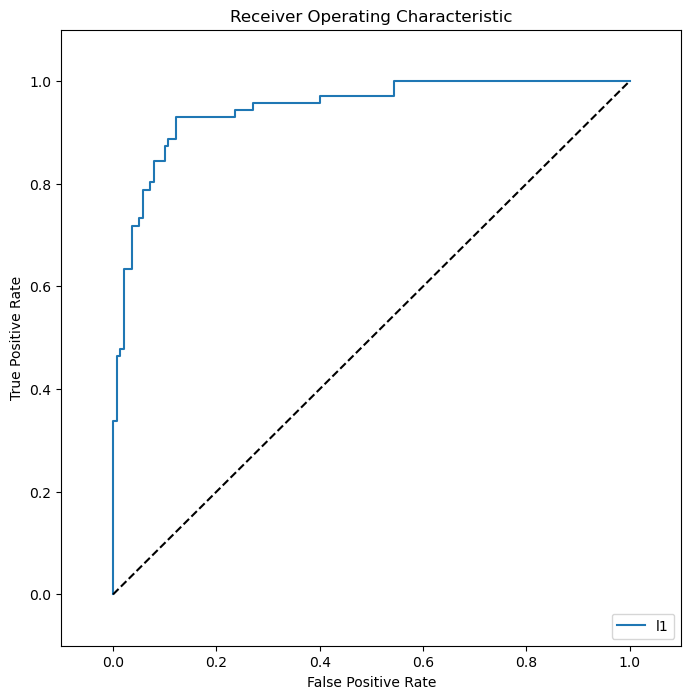

In [53]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
auc(fpr, tpr)

0.9467806841046278